In [1]:
# import tensorflow as tf
import numpy as np
import pandas as pd

from utils.utils import *

from collections import Counter

import matplotlib.pyplot as plt

In [2]:
def count_chars_in_text(text):
    char_dict = {}
    for txt in text:
        for char in  list(txt):
            cur_counter = Counter(char)
            char_dict = {k: char_dict.get(k, 0) + cur_counter.get(k, 0)
                         for k in set(char_dict).union(set(cur_counter))}

    print('Data contains {} distinct characters'.format(len(char_dict.keys())))
    
    return char_dict


def plot_exploratory_hist(atc_freq):

    print(
        'Number of observations (unique free text fields): {}.'.format(sum(atc_freq.values())), '\n'
        'Number of ATC labels: {}.'.format(len(atc_freq.keys())), '\n'
        'Mean number of occurrences per ATC code: {:.3}.'.format(np.mean([float(k) for k in atc_freq.values()]))
    )

    atc_label_freq = [v for v in atc_freq.values()]
    hist, bins = np.histogram(atc_label_freq, 
                              bins=np.max(atc_label_freq))
    width = 1 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.xlabel('Number of label appearance')
    plt.ylabel('Frequency')
    plt.title('Historgram of all label appearance')
    plt.show()

    # fig, ax = plt.subplots()
    # ax.bar(center, hist, align='center', width=width)
    # fig.savefig("1.png")

    atc_label_freq_filtered = [v for v in atc_freq.values() if v <= 10]
    hist, bins = np.histogram(atc_label_freq_filtered, 
                              bins=np.max(atc_label_freq_filtered))
    width = 1 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.xlabel('Number of label appearance')
    plt.ylabel('Frequency')
    plt.title('Historgram of label appearance, appearing 10 times or less')
    plt.show()

    appearing_once_labels = len([one for one in atc_label_freq if one == 1])
    appearing_5more_labels = len([f for f in atc_label_freq if f >= 5])
    appearing_10more_labels = len([f for f in atc_label_freq if f >= 10])

    print('There are {} labels that appear exactly once.'.
          format(appearing_once_labels, ), 
          '\nThis leaves {} labels, {} of which appear 5 times or more and {} appearing at least 10 times'.
          format(len(atc_label_freq) - appearing_once_labels, 
                 appearing_5more_labels, 
                 appearing_10more_labels))

    atc_label_freq_high_filtered = [v for v in atc_freq.values() if v >= 10]

    hist, bins = np.histogram(atc_label_freq_high_filtered, 
                              bins=np.max(atc_label_freq_high_filtered))
    width = 1 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.xlabel('Number of label appearance')
    plt.ylabel('Frequency')
    plt.title('Historgram of label appearance, appearing at least 10 times')
    plt.show()

In [3]:
# print('tensorflow version is {}'.format(tf.__version__))
# print('numpy version is {}'.format(np.__version__))
# print('pd version is {}'.format(pd.__version__))

In [4]:
# initialize data from main (original) CSV file
x, y, n, main_data = init_data()
x = [i for i in x]  # converting x to list, for simplicity and consistency

# initialize data from suggestions CSV file
x_suggest, y_suggest, freq_suggest = init_data_suggest()
x_merge, y_merge = x + x_suggest, y + y_suggest

# create Counter dicts, of the form {element: freq(element)}
labeled_data_freq = Counter(y)  # for original data
merged_data_freq = Counter(y_merge)  # for merged data

In [5]:
main_data.head(5)

,FREETXT,CNT,INGR,ATC,BestOutput,EnglishVsGerman,MoreATCs
0,NaCl 0.9%,315067,(Saline solution),B05B,(Sugar solution) or (Ringer's solution and var...,English,NaN
1,Dafalgan (Filmtabl 1 g) / Paracetamol 1000mg,56346,Paracetamol,N02BE01,Paracetamol,English,NaN
2,Fragmin (Inj L÷s 5000 E/0.2ml) Fertigspr / Dal...,54330,Dalteparin,B01AB04,Dalteparin,English,NaN
3,Perfalgan (Inf L÷s 1 g/100ml) Durchstf / Parac...,54235,Paracetamol,N02BE01,Paracetamol,English,NaN
4,Ringerfundin,53037,(Ringer's solution and variations),B05B,(Sugar solution) or (Ringer's solution and var...,English,NaN


For labeld (original) data:
Number of observations (unique free text fields): 2028. 
Number of ATC labels: 558. 
Mean number of occurrences per ATC code: 3.63.


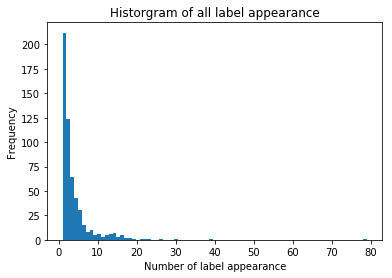

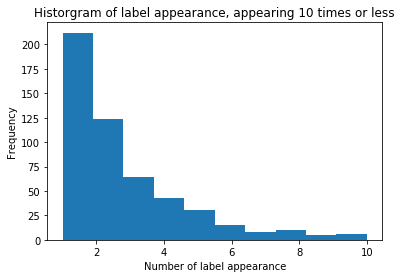

There are 212 labels that appear exactly once. 
This leaves 346 labels, 115 of which appear 5 times or more and 47 appearing at least 10 times


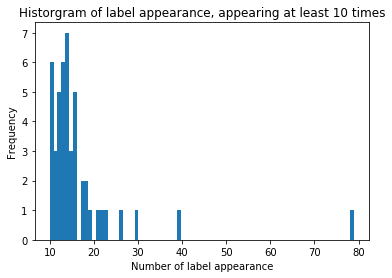

In [6]:
print('For labeld (original) data:')
plot_exploratory_hist(labeled_data_freq)

For the merged data (original data, merged with suggested labels):
Number of observations (unique free text fields): 2919. 
Number of ATC labels: 558. 
Mean number of occurrences per ATC code: 5.23.


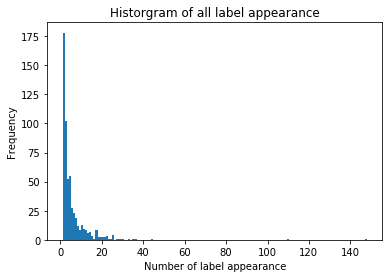

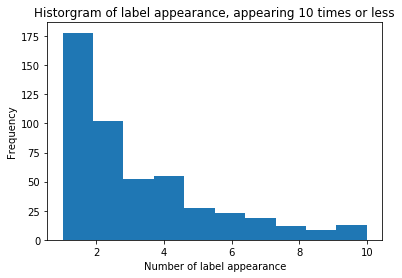

There are 178 labels that appear exactly once. 
This leaves 380 labels, 171 of which appear 5 times or more and 82 appearing at least 10 times


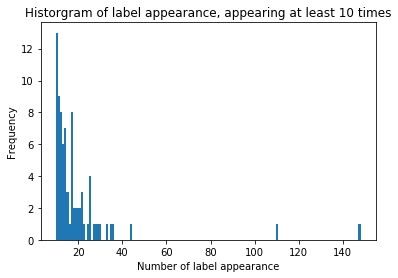

In [7]:
print('For the merged data (original data, merged with suggested labels):')
plot_exploratory_hist(merged_data_freq)

In [8]:
print('For labeld (original) data:')
char_dict_x = count_chars_in_text(x)

For labeld (original) data:
Data contains 81 distinct characters


In [9]:
print('For the merged data (original data, merged with suggested labels):')
char_dict_x_merge = count_chars_in_text(x_merge)

For the merged data (original data, merged with suggested labels):
Data contains 89 distinct characters
